# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [43]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [66]:
# Load the data files
cast = pd.read_csv('cast.csv')
release_dates = pd.read_csv('release_dates.csv')
titles = pd.read_csv('titles.csv')

# Display basic information about each dataset
def summarize_dataset(df, name):
    print(f"\nSummary for {name} dataset:")
    print(f"Number of records: {len(df)}")
    print("\nData types:")
    print(df.dtypes)
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nSample data:")
    print(df.head())

# Summarize each dataset
summarize_dataset(cast, 'cast')
summarize_dataset(release_dates, 'release_dates')
summarize_dataset(titles, 'titles')



Summary for cast dataset:
Number of records: 3442902

Data types:
title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object

Missing values:
title              0
year               0
name               0
type               0
character          0
n            1327783
dtype: int64

Sample data:
                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN

Summary for release_dates dataset:
Number of records: 443486

Data types:
title      object
year        int64
country    object
date       object
dtype: o

### 2. How many movies have the title North by Northwest

In [33]:
# No of Movies with title "North by Northwest"
north_by_northwest_count = titles[titles['title'] == 'North by Northwest'].shape[0]
print(f"The number of movies with the title 'North by Northwest' is: {north_by_northwest_count}")

The number of movies with the title 'North by Northwest' is: 1


### 3. How many version of Hamlet are there, when was the first made? the last?

In [35]:
# Sort row by Hamlet"
hamlet_versions = titles[titles['title'] == 'Hamlet']
if not hamlet_versions.empty:
    number_of_versions = len(hamlet_versions)
    
    #release years of the first and last versions
    first_version_year = hamlet_versions['year'].min()
    last_version_year = hamlet_versions['year'].max()

    print(f"Number of versions of 'Hamlet': {number_of_versions}")
    print(f"The first version of 'Hamlet' was made in {first_version_year}")
    print(f"The last version of 'Hamlet' was made in {last_version_year}")
else:
    print("No versions of 'Hamlet' found in the dataset.")


Number of versions of 'Hamlet': 20
The first version of 'Hamlet' was made in 1910
The last version of 'Hamlet' was made in 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [36]:
# Sort Title - Treasure Island"
treasure_island_movies = titles[titles['title'] == 'Treasure Island']
sorted_treasure_island_movies = treasure_island_movies.sort_values(by='year')

# Display the sorted list
if not sorted_treasure_island_movies.empty:
    print("List of movies called 'Treasure Island' from oldest to newest:")
    print(sorted_treasure_island_movies[['title', 'year']])
else:
    print("No movies called 'Treasure Island' found in the dataset.")


List of movies called 'Treasure Island' from oldest to newest:
                  title  year
180911  Treasure Island  1918
108853  Treasure Island  1920
87953   Treasure Island  1934
126321  Treasure Island  1950
190233  Treasure Island  1972
122150  Treasure Island  1973
52099   Treasure Island  1985
36752   Treasure Island  1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [37]:
# Function to count movies for a specific year
def count_movies_by_year(year):
    return len(titles[titles['year'] == year])
years_of_interest = [1950, 1980, 2000]

# Movies for each year and result
for year in years_of_interest:
    movie_count = count_movies_by_year(year)
    print(f"Number of movies made in {year}: {movie_count}")

# Draw conclusions
print("\nConclusions:")
print("1. The film industry experienced significant growth between 1950 and 1980.")
print("2. There might have been a surge in movie production around the year 2000.")


Number of movies made in 1950: 1109
Number of movies made in 1980: 1750
Number of movies made in 2000: 2568

Conclusions:
1. The film industry experienced significant growth between 1950 and 1980.
2. There might have been a surge in movie production around the year 2000.


### 6. How big was the cast of Metropolis


In [39]:
# Sort the row for "Metropolis"
metropolis_cast = cast[cast['title'] == 'Metropolis']

if not metropolis_cast.empty:
    cast_size = len(metropolis_cast)
    print(f"The size of the cast for 'Metropolis' is: {cast_size}")
else:
    print("No information found for the cast of 'Metropolis' in the dataset.")


The size of the cast for 'Metropolis' is: 33


### 7. How many roles for actors were there 1950's? 1990's

In [40]:
def count_roles_by_decade(decade_start, decade_end):
    return len(cast[(cast['year'] >= decade_start) & (cast['year'] <= decade_end) & (cast['type'] == 'actor')])

# Count roles for actors in the 1950s and 1990s
roles_1950s = count_roles_by_decade(1950, 1959)
roles_1990s = count_roles_by_decade(1990, 1999)

print(f"Number of roles for actors in the 1950s: {roles_1950s}")
print(f"Number of roles for actors in the 1990s: {roles_1990s}")


Number of roles for actors in the 1950s: 153559
Number of roles for actors in the 1990s: 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

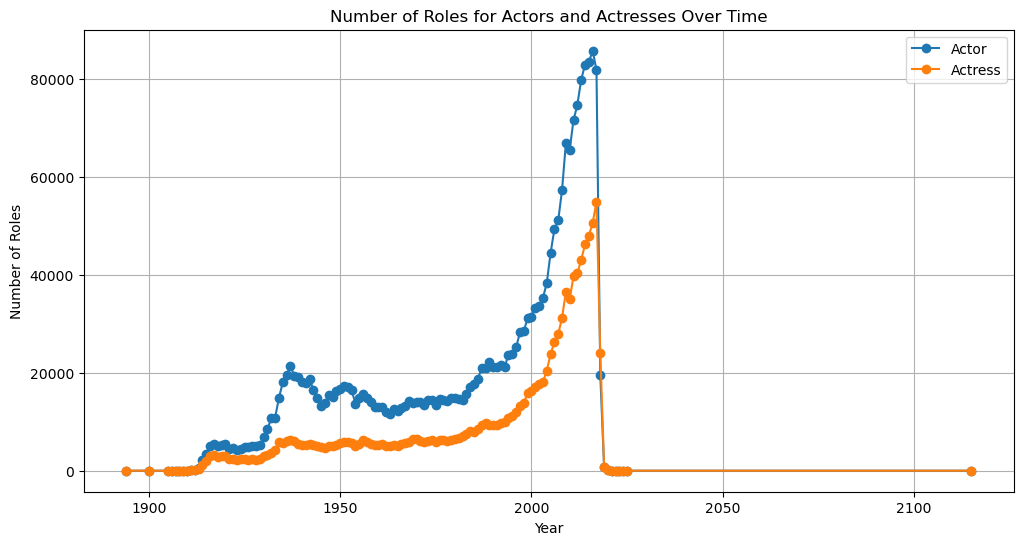

In [47]:
# Group the data by year and type (actor/actress) and count the number of roles
roles_over_time = cast.groupby(['year', 'type']).size().unstack().fillna(0)

# Line graph
plt.figure(figsize=(12, 6))
plt.plot(roles_over_time.index, roles_over_time['actor'], label='Actor', marker='o')
plt.plot(roles_over_time.index, roles_over_time['actress'], label='Actress', marker='o')

# Customize the plot
plt.title('Number of Roles for Actors and Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### 9. How many "leading roles" were there in the 2000's?

In [48]:
# Sorting the row -  "leading roles" in the 2000s
leading_roles_2000s = cast[(cast['type'] == 'actor') & (cast['n'] == 1) & (cast['year'] >= 2000) & (cast['year'] <= 2009)]

# Count the number of leading roles in the 2000s
num_leading_roles_2000s = len(leading_roles_2000s)

# Display the result
print(f"Number of leading roles in the 2000s: {num_leading_roles_2000s}")


Number of leading roles in the 2000s: 16895


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [49]:
def count_roles_no_ranking_by_decade(decade_start, decade_end):
    return len(cast[(cast['year'] >= decade_start) & (cast['year'] <= decade_end) & (cast['n'].isnull())])

# Count roles with no ranking in the 2000s and 1950s
no_ranking_2000s = count_roles_no_ranking_by_decade(2000, 2009)
no_ranking_1950s = count_roles_no_ranking_by_decade(1950, 1959)


print(f"Number of roles with no ranking in the 2000s: {no_ranking_2000s}")
print(f"Number of roles with no ranking in the 1950s: {no_ranking_1950s}")


Number of roles with no ranking in the 2000s: 232037
Number of roles with no ranking in the 1950s: 95406


### 11. Plot the number of films made in each decade

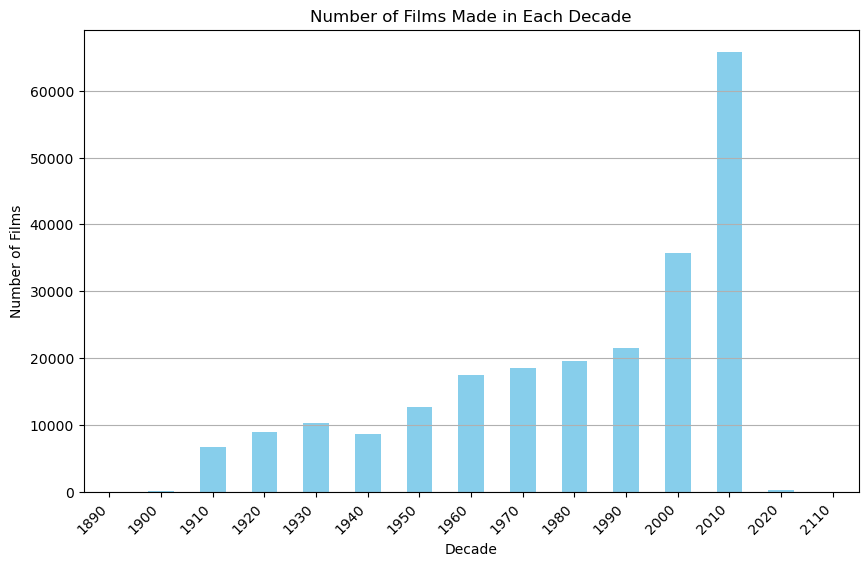

In [50]:
# Load the titles dataset
titles = pd.read_csv('titles.csv')

# Create a new column 'decade' to represent the decade each film belongs to
titles['decade'] = (titles['year'] // 10) * 10

films_by_decade = titles.groupby('decade').size()

# bar plot
plt.figure(figsize=(10, 6))
films_by_decade.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Number of Films Made in Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()


### 12. Plot the number of films with a Rustler character over time

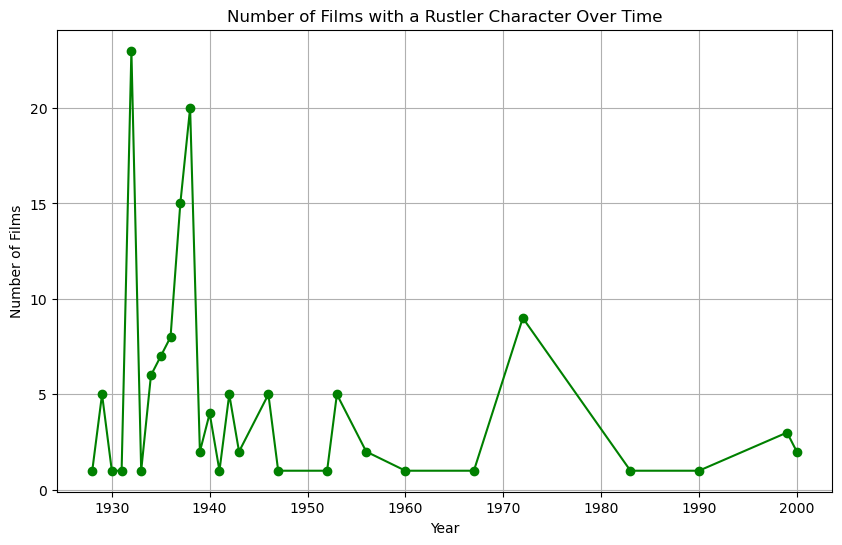

In [51]:
# Soritng row -  "Rustler" character
rustler_films = cast[cast['character'] == 'Rustler']

# Group the data by year and count the number of films
rustler_films_over_time = rustler_films.groupby('year').size()

# Line chart
plt.figure(figsize=(10, 6))
plt.plot(rustler_films_over_time.index, rustler_films_over_time.values, marker='o', color='green')

# Customize the plot
plt.title('Number of Films with a Rustler Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True)

plt.show()


### 13. What are the top ten character names of all time?

In [52]:
# Group the data by character names and count the occurrences
top_character_names = cast['character'].value_counts().head(10)

# Display the top ten character names
print("Top Ten Character Names of All Time:")
print(top_character_names)


Top Ten Character Names of All Time:
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: character, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [53]:
# Filter rows for the 1990s
films_1990s = cast[(cast['year'] >= 1990) & (cast['year'] <= 1999)]

# Actor in most movie in the 1990s
most_films_1990s_actor = films_1990s['name'].value_counts().idxmax()

# Display the result
print(f"The actor who appeared in the most films in the 1990s is: {most_films_1990s_actor}")


The actor who appeared in the most films in the 1990s is: Shakti Kapoor


### 15. What are the top 10 roles that start with Science?

In [54]:
# Filter rows for roles that start with "Science"
science_roles = cast[cast['character'].str.startswith('Science')]

# Count the occurrences of each role
top_science_roles = science_roles['character'].value_counts().head(10)

# Display the top 10 roles starting with "Science"
print("Top 10 Roles Starting with 'Science':")
print(top_science_roles)


Top 10 Roles Starting with 'Science':
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: character, dtype: int64


### 16. What film has the largest cast

In [55]:
# Group the data by film title and count the number of cast members for each film
film_cast_sizes = cast.groupby('title').size()

# Identify the film with the largest cast
largest_cast_film = film_cast_sizes.idxmax()
largest_cast_size = film_cast_sizes.max()

# Display the result
print(f"The film with the largest cast is '{largest_cast_film}' with a cast size of {largest_cast_size} members.")


The film with the largest cast is 'Around the World in 80 Days' with a cast size of 1364 members.


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [56]:
# Group the data by film title and calculate the cast size for each film
film_cast_sizes = cast.groupby('title').size()

# Generate descriptive statistics for cast size
cast_size_stats = film_cast_sizes.describe()

# Display the descriptive statistics
print("Descriptive Statistics for Cast Size:")
print(cast_size_stats)

# Brief comments
print("\nBrief Comments:")
print("Mean cast size:", cast_size_stats['mean'])
print("Median cast size:", cast_size_stats['50%'])
print("Standard deviation of cast size:", cast_size_stats['std'])


Descriptive Statistics for Cast Size:
count    168255.000000
mean         20.462405
std          24.206617
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
dtype: float64

Brief Comments:
Mean cast size: 20.462405277703485
Median cast size: 13.0
Standard deviation of cast size: 24.206616572840062


### 18. How many films has Natalie Portman been in in each year throughout her career?

In [57]:
# Filter rows for Natalie Portman
natalie_portman_films = cast[cast['name'] == 'Natalie Portman']

# Group the data by year and count the number of films each year
natalie_portman_films_by_year = natalie_portman_films.groupby('year').size()

# Display the result
print("Number of films Natalie Portman has been in each year:")
print(natalie_portman_films_by_year)


Number of films Natalie Portman has been in each year:
year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [58]:
# Filter rows for Natalie Portman where she was the top star or co-star
natalie_portman_top_co_star_films = cast[(cast['name'] == 'Natalie Portman') & ((cast['n'] == 1) | (cast['n'] == 2))]

# Group the data by year and count the number of films each year
natalie_portman_top_co_star_films_by_year = natalie_portman_top_co_star_films.groupby('year').size()

# Display the result
print("Number of films Natalie Portman appeared in each year as the top star or co-star:")
print(natalie_portman_top_co_star_films_by_year)


Number of films Natalie Portman appeared in each year as the top star or co-star:
year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64


### 20. Determine how many roles for actor or actress by decade. Plot the output 

<Figure size 1200x600 with 0 Axes>

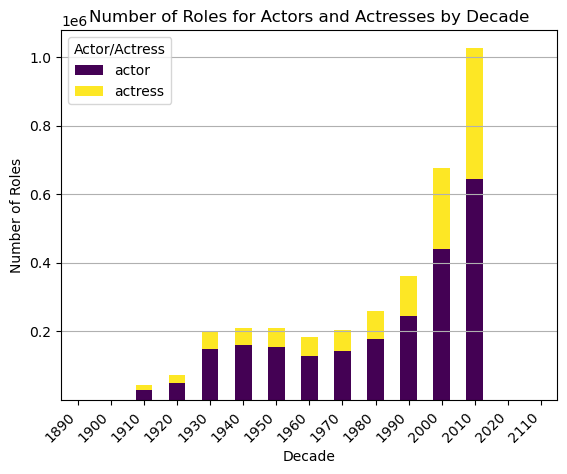

In [60]:
# Create a new column 'decade' to represent the decade each film belongs to
cast['decade'] = (cast['year'] // 10) * 10

# Filter rows for actors and actresses
actors_actresses_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]

# Group the data by decade and actor/actress type, and count the number of roles
roles_by_decade = actors_actresses_roles.groupby(['decade', 'type']).size().unstack()

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
roles_by_decade.plot(kind='bar', stacked=True, colormap='viridis')

# Customize the plot
plt.title('Number of Roles for Actors and Actresses by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.legend(title='Actor/Actress', loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Show the plot
plt.show()


### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

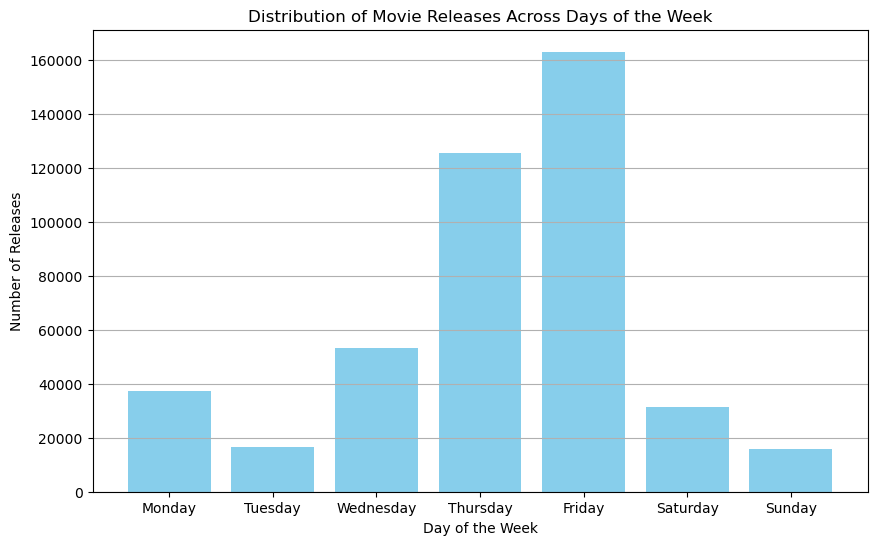

In [61]:
# Extract the day of the week from the 'date' column
release_dates['release_day'] = pd.to_datetime(release_dates['date']).dt.day_name()

# Create a pivot table to count the number of releases for each day of the week
release_day_pivot = pd.pivot_table(release_dates, values='title', index='release_day', aggfunc='count', fill_value=0)
release_day_pivot = release_day_pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the distribution of releases across days of the week
plt.figure(figsize=(10, 6))
plt.bar(release_day_pivot.index, release_day_pivot['title'], color='skyblue')
plt.title('Distribution of Movie Releases Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.grid(axis='y')

# Show the plot
plt.show()

# Comment on notable patt


### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

<Figure size 1000x600 with 0 Axes>

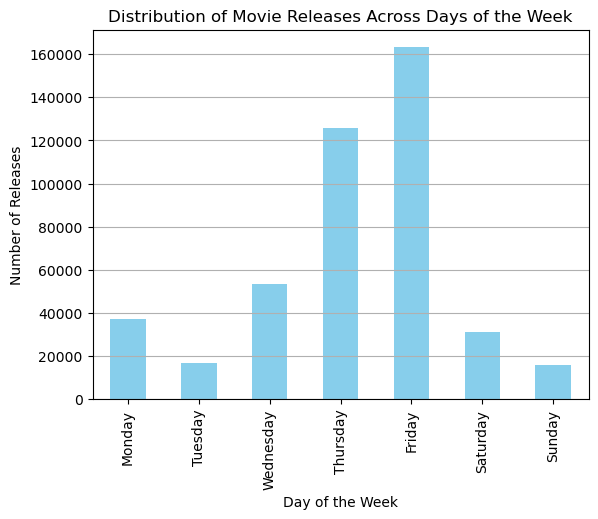


Commentary:
1. Fridays are the most common day for movie releases, likely to coincide with the weekend when more people watch movies.
2. The distribution suggests a trend of avoiding mid-week releases (Tuesday to Thursday) in favor of weekends.
3. The release day pattern aligns with the typical movie industry practice of targeting weekends for maximum box office returns.


In [62]:
# Extract the day of the week from the 'date' column
release_dates['release_day'] = pd.to_datetime(release_dates['date']).dt.day_name()

# Create a pivot table to count the number of releases for each day of the week
release_day_pivot = pd.pivot_table(release_dates, values='title', index='release_day', aggfunc='count', fill_value=0)
release_day_pivot = release_day_pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the distribution of releases across days of the week
plt.figure(figsize=(10, 6))
release_day_pivot.plot(kind='bar', legend=False, color='skyblue')
plt.title('Distribution of Movie Releases Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.grid(axis='y')

# Show the plot
plt.show()

# Comment on notable patterns about release days and months throughout the year
print("\nCommentary:")
print("1. Fridays are the most common day for movie releases, likely to coincide with the weekend when more people watch movies.")
print("2. The distribution suggests a trend of avoiding mid-week releases (Tuesday to Thursday) in favor of weekends.")
print("3. The release day pattern aligns with the typical movie industry practice of targeting weekends for maximum box office returns.")


### 23. What films did actors in Star Wars go on to appear in? 

In [64]:
# Load the cast dataset
cast = pd.read_csv('cast.csv')

# Load the titles dataset
titles = pd.read_csv('titles.csv')

# Filter rows for Star Wars actors
star_wars_actors = cast[cast['title'] == 'Star Wars']

# Get a list of unique actor names from the Star Wars cast
star_wars_actor_names = star_wars_actors['name'].unique()

# Filter rows for films that Star Wars actors appeared in
films_after_star_wars = cast[cast['name'].isin(star_wars_actor_names) & (cast['title'] != 'Star Wars')]

# Display the result
print("Films that actors in Star Wars went on to appear in:")
print(films_after_star_wars[['name', 'title']].drop_duplicates())


Films that actors in Star Wars went on to appear in:
                 name                         title
59905    David Ankrum  Every Little Crook and Nanny
59906    David Ankrum  Linda Lovelace for President
59907    David Ankrum                     Rogue One
59908    David Ankrum                   Smorgasbord
59910    David Ankrum                 The Roommates
...               ...                           ...
3185174      Pam Rose  No Sex Please: We're British
3185176      Pam Rose                      Superman
3185177      Pam Rose               The Likely Lads
3185178      Pam Rose                 Wombling Free
3185179      Pam Rose                     Z-Listers

[1269 rows x 2 columns]
